In [2]:
import os

All_Data = '../Data/'
oscar_agency_list = All_Data + 'observing_systems_capability_analysis_and_review_tool/'
os.listdir(oscar_agency_list)

['oscar_agency_list_03_25_21.xlsx']

# Data Source - Union For Concerned Scientists

This is an in-depth databse built by experts at UCS detailing the over 2,218 satellites currently orbiting Earth, including their country of origin, purpose, and other operational details. It is available as a downloadable Excel file, which is updated roughly quarterly. The databse will be used to collect open-source information on the operational specific satellites, their launch sites and other information that will be discussed in the sections below.

## First Look in Pandas

The database is downloaded as an excel workbook but had to be converted to a Pandas dataframe which is is a 2-dimensional labeled data structure with columns of potentially different types. Dataframes are great ways to perform operations on rows and columns and is widely used in Data Science statistical analysis of all sorts. We will use the Pandas library to create our dataframe and perform queries for the data that we need.

In [ ]:
# Install the gspread library to access google spreadsheets in colab
!pip install --upgrade --quiet gspread

In [5]:
import pandas as pd

# Reading in Database from Union of Concerned Scientist for Analysis
oscar_agency_list_xlx = oscar_agency_list + '/oscar_agency_list_03_25_21.xlsx'

UCS_df = pd.read_excel(oscar_agency_list_xlx)
UCS_df.columns

Index(['Id', 'Acronym', 'Name', 'Country', 'Website', 'Logo',
       'Spaceagency Programmes'],
      dtype='object')

In [ ]:
price_df.pivot(index='date', columns='ticker', values='open')

In [ ]:
UCS_df.head(5)

,"Name of Satellite, Alternate Names",Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data
0,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,0.0,476,500,0.001750,97.40,95.00,4.0,NaN,NaN,2018-11-29,NaN,Universitat Politècnica de Catalunya,Spain,Satish Dhawan Space Centre,PSLV,2018-096K,43728,Student built.,Estimated
1,Aalto-1,Finland,Finland,University of Aalto,Civil,Technology Development,NaN,LEO,NaN,0.0,497,517,0.001454,97.45,94.70,4.5,NaN,4.5,2017-06-23,2.0,University of Aalto,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775,Technology development and education.,JMSatcat/10_17
2,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,442,687,0.017665,98.20,95.90,1.0,NaN,NaN,2016-04-25,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460,Carries AIS system.,Space50
3,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,35778,35793,0.000178,0.08,1436.03,6330.0,NaN,16000,2014-02-06,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transpond...",ZARYA
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-75.0,35700,35700,0.000000,0.00,1436.10,1800.0,NaN,NaN,2016-06-15,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588,NaN,Estimated


### Pandas.Info

In [ ]:
UCS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Name of Satellite, Alternate Names  2218 non-null   object        
 1   Country/Org of UN Registry          2218 non-null   object        
 2   Country of Operator/Owner           2218 non-null   object        
 3   Operator/Owner                      2218 non-null   object        
 4   Users                               2218 non-null   object        
 5   Purpose                             2218 non-null   object        
 6   Detailed Purpose                    854 non-null    object        
 7   Class of Orbit                      2218 non-null   object        
 8   Type of Orbit                       1594 non-null   object        
 9   Longitude of GEO (degrees)          2216 non-null   float64       
 10  Perigee (km)            

In [ ]:
UCS_df.isnull().sum()

Name of Satellite, Alternate Names       0
Country/Org of UN Registry               0
Country of Operator/Owner                0
Operator/Owner                           0
Users                                    0
Purpose                                  0
Detailed Purpose                      1364
Class of Orbit                           0
Type of Orbit                          624
Longitude of GEO (degrees)               2
Perigee (km)                             0
Apogee (km)                              0
Eccentricity                             0
Inclination (degrees)                    0
Period (minutes)                         0
Launch Mass (kg.)                      167
Dry Mass (kg.)                        1756
Power (watts)                         1602
Date of Launch                           0
Expected Lifetime (yrs.)              1077
Contractor                               0
Country of Contractor                    0
Launch Site                              0
Launch Vehi

### Pandas.Describe

In [ ]:
# Quick statistical description of numerical values.
UCS_df.describe()

,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Expected Lifetime (yrs.),NORAD Number
count,2216.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2051.000000,1141.000000,2218.000000
mean,5.643100,10728.768711,12183.392696,0.016083,60.509225,508.050406,1504.130804,9.969544,39015.945897
std,47.689443,15347.973916,20388.299337,0.098612,40.543308,713.712788,2138.592316,4.979366,5806.790874
min,-179.800000,200.000000,300.000000,0.000000,0.000000,90.520000,1.000000,0.250000,7530.000000
25%,0.000000,500.000000,541.500000,0.000289,6.120000,95.200000,6.000000,5.000000,37234.750000
50%,0.000000,634.500000,703.000000,0.000903,74.050000,98.000000,447.000000,10.000000,41182.500000
75%,0.000000,35314.250000,35786.000000,0.001454,97.500000,1434.865000,2497.500000,15.000000,43221.500000
max,328.500000,62200.000000,330000.000000,0.957119,143.400000,11520.000000,18000.000000,30.000000,53160.000000


### Unique Values in each Column

In [ ]:
for column in list(UCS_df.columns):
  print(f"Column -- {column} -- has *** {len(UCS_df[column].unique())} *** amount of unique values")

Column -- Name of Satellite, Alternate Names -- has *** 2212 *** amount of unique values
Column -- Country/Org of UN Registry -- has *** 58 *** amount of unique values
Column -- Country of Operator/Owner -- has *** 99 *** amount of unique values
Column -- Operator/Owner -- has *** 515 *** amount of unique values
Column -- Users -- has *** 17 *** amount of unique values
Column -- Purpose -- has *** 24 *** amount of unique values
Column -- Detailed Purpose -- has *** 32 *** amount of unique values
Column -- Class of Orbit -- has *** 4 *** amount of unique values
Column -- Type of Orbit -- has *** 9 *** amount of unique values
Column -- Longitude of GEO (degrees) -- has *** 461 *** amount of unique values
Column -- Perigee (km) -- has *** 681 *** amount of unique values
Column -- Apogee (km) -- has *** 673 *** amount of unique values
Column -- Eccentricity -- has *** 1370 *** amount of unique values
Column -- Inclination (degrees) -- has *** 403 *** amount of unique values
Column -- Perio

## Country/Org of UN Registry - Analysis

In [ ]:
UCS_df["Country/Org of UN Registry"].value_counts()

USA                     704
NR                      354
NR (11/19)              269
China                   238
Russia                  157
Japan                    71
France                   68
United Kingdom           58
India                    47
Germany                  31
ESA                      23
Canada                   21
Luxembourg               19
Australia                12
Brazil                   12
South Korea              12
Saudi Arabia             11
Italy                     8
Norway                    8
United Arab Emirates      7
Belgium                   6
Indonesia                 6
EUMETSAT                  6
Mexico                    5
Algeria                   5
Uruguay                   5
Spain                     4
Denmark                   4
Finland                   4
Turkey                    3
Pakistan                  3
Argentina                 3
Malaysia                  3
Azerbaijan                2
Poland                    2
Nigeria             

## Users - Analysis

In [ ]:
UCS_df.Users.value_counts()

Commercial                        1033
Government                         419
Military                           331
Civil                              151
Government/Commercial              112
Military/Commercial                 75
Military/Government                 49
Government/Civil                    28
Government/Military                  5
Military/Civil                       5
Civil/Government                     3
Commercial/Military                  2
Military                             1
Commercial                           1
Civil/Military                       1
Government/Commercial/Military       1
Commercial/Government                1
Name: Users, dtype: int64

Since this is a statistical description of the whole database, their values might not be of much significance at all. However, if we look at the max value for Launch Mass, we can see that the mass of the highest vehicle launched had a mass of 18,000 Kilograms. So it would be interest to know what that vehicle was, where it was launch from and other information that could be used in our study.

In [ ]:
Unique_Purposes = list(UCS_df.Purpose.unique())

In [ ]:
UCS_df.groupby("Country of Operator/Owner").median()

,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Expected Lifetime (yrs.),NORAD Number
Country of Operator/Owner,,,,,,,,,
Algeria,0.000,661.0,698.0,0.000997,98.200,98.30,117.0,5.0,41786.0
Argentina,0.000,598.5,650.5,0.001384,97.350,97.35,35.0,15.0,40606.5
Australia,147.500,35758.0,35786.0,0.000374,0.060,1435.40,2350.0,15.0,41367.0
Austria,0.000,770.0,784.0,0.000979,98.600,100.30,14.0,NaN,39091.0
Azerbaijan,45.500,35764.0,35772.0,0.000095,0.030,1436.09,3375.0,15.0,41355.5
...,...,...,...,...,...,...,...,...,...
United Arab Emirates,22.065,35753.5,35793.5,0.000655,4.415,1435.96,4487.5,12.0,38832.0
United Kingdom,0.000,8062.0,8069.0,0.000391,0.120,287.92,650.0,15.0,40350.0
United Kingdom/ESA,25.000,35786.0,35787.0,0.000012,0.020,1436.09,6650.0,15.0,39215.0


In [ ]:
UCS_df.groupby("Country of Operator/Owner").mean()

,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Expected Lifetime (yrs.),NORAD Number
Country of Operator/Owner,,,,,,,,,
Algeria,-4.960000,7676.800000,7706.800000,0.001490,78.548000,365.740000,1117.000000,7.500000,41039.400000
Argentina,-10.914286,5602.500000,5651.000000,0.003311,75.116429,288.002857,654.416667,11.666667,37752.714286
Australia,90.262500,21075.000000,21125.583333,0.002799,38.544167,877.497500,2344.166667,13.750000,38845.750000
Austria,0.000000,770.000000,784.000000,0.000979,98.600000,100.300000,14.000000,NaN,39091.000000
Azerbaijan,45.500000,35764.000000,35772.000000,0.000095,0.030000,1436.090000,3375.000000,15.000000,41355.500000
...,...,...,...,...,...,...,...,...,...
United Arab Emirates,27.853750,22563.500000,22593.750000,0.000719,37.746250,933.515000,3351.250000,11.800000,38019.125000
United Kingdom,8.174921,14698.857143,14717.650794,0.000659,32.992063,603.917302,1606.225806,12.400000,38652.952381
United Kingdom/ESA,25.000000,35786.000000,35787.000000,0.000012,0.020000,1436.090000,6650.000000,15.000000,39215.000000


In [ ]:
UCS_df.groupby("Country of Operator/Owner").describe()

Longitude of GEO (degrees)  ... NORAD Number
                                               count  ...          max
Country of Operator/Owner                             ...             
Algeria                                          5.0  ...      43039.0
Argentina                                       14.0  ...      43641.0
Australia                                       12.0  ...      43809.0
Austria                                          1.0  ...      39091.0
Azerbaijan                                       2.0  ...      43632.0
...                                              ...  ...          ...
United Arab Emirates                             8.0  ...      43676.0
United Kingdom                                  63.0  ...      44115.0
United Kingdom/ESA                               1.0  ...      39215.0
Venezuela                                        3.0  ...      42954.0
Vietnam                                          4.0  ...      43935.0

[99 rows x 72 columns]

In [ ]:
# Grouped by users and counting by countries (this would show which use is more popular in each country)
UCS_Country_Purpose_groups = UCS_df.groupby(["Country of Operator/Owner", "Purpose"])
print(f"This Groupby Created {len(UCS_Country_Purpose_groups)} unique Country of Operator/Owner vs Purpose Pairs")

This Groupby Created 220 unique Country of Operator/Owner vs Purpose Pairs


In [ ]:
counter = 0

for purpose in Unique_Purposes:
  try:
    print(UCS_Country_Purpose_groups.get_group(('Algeria', purpose)).head(5))
    counter += 1
  except KeyError:
    continue

print(counter)

   Name of Satellite, Alternate Names  ... Source Used for Orbital Data
51                           AlSat-1N  ...               JMSatcat/12_16

[1 rows x 28 columns]
   Name of Satellite, Alternate Names  ...   Source Used for Orbital Data
49                           Alsat 2B  ...                 JMSatcat/12_16
50                           Alsat-1B  ...                 JMSatcat/12_16
52    Alsat-2A (Algeria Satellite 2A)  ...  www.satellitedebris.net 12/12

[3 rows x 28 columns]
              Name of Satellite, Alternate Names  ... Source Used for Orbital Data
45  Alcomsat (Algerian Communications Satellite)  ...                   JMGEO/3_18

[1 rows x 28 columns]
3


In [ ]:
ucs_operator_user = UCS_df.groupby(["Country of Operator/Owner"])["Users"].count()
ucs_data_top_operators = ucs_operator_user.sort_values(axis=0, ascending=False)
ucs_data_top_operators.head(10)

Country of Operator/Owner
USA               988
China             320
Russia            161
Japan              78
Multinational      64
United Kingdom     63
India              57
ESA                50
Canada             39
Germany            36
Name: Users, dtype: int64

In [ ]:
ucs_un_reg_user = UCS_df.groupby(["Country/Org of UN Registry"])["Users"].count()
ucs_data_top_unreg = ucs_un_reg_user.sort_values(axis=0, ascending=False)
ucs_data_top_unreg.head(10)

Country/Org of UN Registry
USA               704
NR                354
NR (11/19)        269
China             238
Russia            157
Japan              71
France             68
United Kingdom     58
India              47
Germany            31
Name: Users, dtype: int64

In [ ]:
grouped = UCS_df.groupby(['Launch Mass (kg.)', 'Name of Satellite, Alternate Names'])

In [ ]:
grouped.last()

Country/Org of UN Registry  ... Source Used for Orbital Data
Launch Mass (kg.) Name of Satellite, Alternate Names                                             ...                             
1.0               AAUSat-4                                                              Denmark  ...                      Space50
                  Beesat-9 (Tubsat-17)                                                  Germany  ...               JMSatcat/11_19
                  BisonSat (Nwist Qwiqway)                                                   NR  ...                     JM/12_15
                  Duchifat-1                                                                 NR  ...                          NaN
                  Exoconnect (D-Star One)                                            NR (11/19)  ...               JMSatcat/11_19
...                                                                                         ...  ...                          ...
14500.0           Lacrosse/Onyx 5 (Lacrosse-5, NROL 16, USA 182)                            USA  ...                    SC - ASCR
18000.0           Keyhole 5 (Advanced KH-11, KH-12-5, Improved Cr...                        USA  ...                         JMSR
                  Keyhole 6 (NRO L49, Advanced KH-11, KH-12-6, Im...                        USA  ...               JMSatcat/2_USA
                  Keyhole 7 (NRO L65, Advanced KH-11, Improved Cr...                        USA  ...                        ZARYA
                  Keyhole 8 (NRO L71, Advanced KH-11, Improved Cr...                 NR (11/19)  ...                JMSatcat/3_19

[2046 rows x 26 columns]

In the above results we can see that a total of four satellites had a Launch Mass of 18000 kilograms and had similar characteristics. All four were Military Satellites Launched by the United States, all found were Earth Obvservation Satellites, all four were Launched to Lower Earth Orbit, so on and so on. So this means that as we progress in our feasiblity study we can make a case for Military Vehicles as the number one source of potential revenue since they tend to launch heavier vehicles and would benefit the most from the cost savings associated with launching from an Equatorial location. Again, this is simply an example of the versatility that using Python and associated libraries for analytical purposes can help us out.

## Frequently used Launch Sites

In order to compare our theoretical spaceport to others, I would be interesting to see which are the most frequently used launch sites in the database that we loaded in and see their geographic locations in the map that we generated above.

In [ ]:
# Doing a value count of all 
# launches per Launch site 
UCS_df['Launch Site'].value_counts()

Satish Dhawan Space Centre              311
Cape Canaveral                          311
Baikonur Cosmodrome                     294
Guiana Space Center                     273
Vandenberg AFB                          245
Jiuquan Satellite Launch Center         140
Plesetsk Cosmodrome                     107
Xichang Satellite Launch Center         106
Taiyuan Launch Center                    86
Vostochny Cosmodrome                     64
Dombarovsky Air Base                     57
Tanegashima Space Center                 43
International Space Station              33
Rocket Lab Launch Complex 1              32
Sea Launch Odyssey                       28
Wallops Island Flight Facility           27
International Space Station - Cygnus     12
Uchinoura Space Center                   10
Orbital ATK L-1011                        8
Cygnus                                    8
Yellow Sea Launch Platform                7
Palmachim Launch Complex                  5
Kodiak Launch Complex           

We see that within the top five most used Launch pads there is one that has a position of 45 degree latitude (Baikonur Cosmodrome) in Kazakhstan used by the Russians. So this would be a case against our equatorial launch site. In thing to ask ourselves is which satelittes did they launching from the mentioned location which Launch Masses, what were the target orbits, so on and so on. More in depth analysis can be made which would answer those questions.

## Frequent Users and Country of Origin
Other points can be made about the most frequent users of Satellites according to the data gathered in this database. In the below query we can see that commercial vehicles are commercial satellites are an overwhelming majority with 1033 satellites. Futher analysis can be made to know which are the heaviest vehicles and where they were launched from to make a case for a potential cost savings for using the East African Spaceport as a solution.

In [ ]:
#Grouped by users and counting by countries (this would show which use is more popular in each country)
ucs_date_countries = UCS_df.groupby(["Users"])["Country/Org of UN Registry"].count()
ucs_date_countries

Users
Civil                              151
Civil/Government                     3
Civil/Military                       1
Commercial                        1033
Commercial                           1
Commercial/Government                1
Commercial/Military                  2
Government                         419
Government/Civil                    28
Government/Commercial              112
Government/Commercial/Military       1
Government/Military                  5
Military                           331
Military                             1
Military/Civil                       5
Military/Commercial                 75
Military/Government                 49
Name: Country/Org of UN Registry, dtype: int64

## Launch Mass vs Longitude Scatter Plot

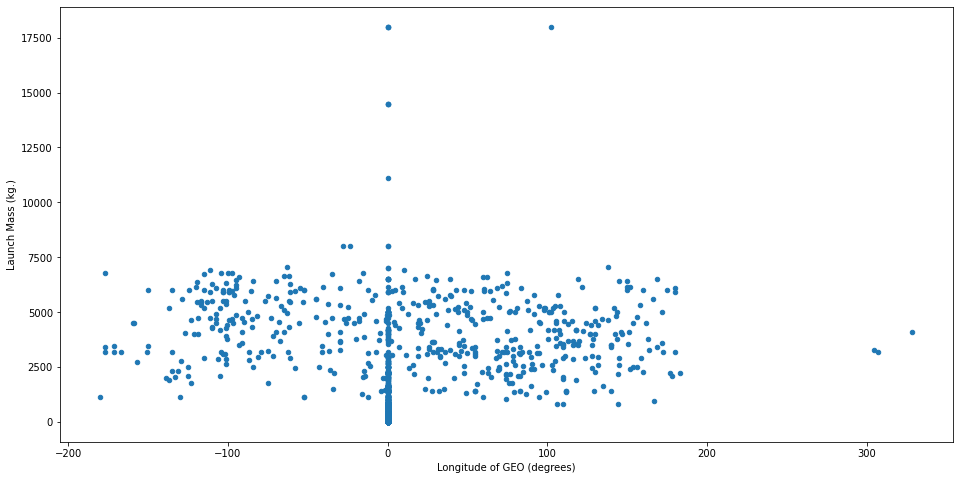

In [ ]:
UCS_df.plot(kind='scatter', x='Longitude of GEO (degrees)', y='Launch Mass (kg.)', figsize=(16,8))